In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from optimizer import *

### 테스트용 함수

In [2]:
def f(x, y):
    return x**2 / 20.0 + y**2

### 테스트용 함수 f의 도함수
### 도함수를 보면 알 수 있듯, 함수 f는 비등방성 함수이다.
### 비등방성 함수 : 방향에 따라 기울기(성질)가 달라지는 함수.
### X는 10 변할때 1 만큼 변하는 반면, Y는 10 변할 때 20 만큼 변한다. (20배 차이)

In [3]:
def df(x, y):
    return x / 10.0, 2.0*y

### optimizers["SGD"]에는 SGD 클래스가 0.95의 학습률을 가지고 저장됨.

In [4]:
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0
# 여기까지는 기본 세팅 : params, grads를 각각 x, y로 보기 좋게 dict 형태로 초기화 함.
# 신경망에 실제로 적용할 때는 np.ndarray로 하는 것이 훨씬 좋아보임.

optimizers = OrderedDict()
# optimizers["SGD"] = SGD(lr=0.95) # 1
# optimizers["SGD"] = SGD(lr=0.5) # 2
# optimizers["SGD"] = SGD(lr=0.05) # 3
# optimizers["Momentum"] = Momentum(lr=0.1) # 4
# optimizers["Momentum"] = Momentum(momentum=0.5, lr=0.1) # 5
# optimizers["Momentum"] = Momentum(momentum=1.5, lr=0.1) # 6
# optimizers["Momentum"] = Momentum(momentum=1.0, lr=0.1) # 7
# optimizers["AdaGrad"] = AdaGrad(lr=0.95) # 8
optimizers["Adam"] = Adam(lr=0.3) # 9

# optimizer를 함수에 실행하는 건 파일 맨 아래에 있음.

### gradient는 기울기 벡터이므로 여기서는 grads['x'], grads['y'] 두 차원의 기울기를 저장
### -> gradient = (grads['x'], grads['y'])
---
# **SGD**
### SGD의 update 함수는 학습률과 gradient의 곱의 반대방향으로 가중치를 업데이트 함.
### params -= lr * grads
![](./SGD.png)
### 여기서 알 수 있는 점은 params의 변화량이 lr과 gradient에 비례한다는 것.
---
# optimizers를 #1처럼 정의했을 때
# 문제 발생
### -> gradient 값이 작은 X 방향은 Y 방향에 비해 변하는 양이 20배 차이 남.
### -> learning rate의 값이 0.95일 때, X 방향으로는 영향이 비교적 적어서 천천히 이동하지만, Y 방향으로는 X 방향에 비해 너무 많이 움직임.
### -> 이동할 때 마다 Y가 이동해야하는 방향이 바뀌어서 비효율적으로 움직임.
---
# optimizers를 #2처럼 정의했을 때
# 문제 발생
### -> Y 방향으로 너무 많이 움직이는 문제를 완화하기 위해 learning rate를 0.5로 줄임.
### -> Y 방향으로으로는 최적의 기울기를 한 번에 찾았으나, X 방향의 이동폭이 너무 작아서 X의 최적의 기울기를 갱신하는데 너무 오래 걸림
### -> 여전히 비효율적.
---
# optimizers를 #3처럼 정의했을 때
### Y 방향의 문제는 없음. 한 번에 이동하는 것보다 오히려 천천히 이동하는 것이 함수가 복잡해졌을 때는 더 좋을 것으로 보임.
### X 방향의 문제는 확대. X 값을 찾는 데 시간이 너무 오래 걸림.
---
# **Momentum**
### Momentum의 update 함수는 학습률과 gradient의 값의 곱의 반대방향에 momentum * velocity 값을 더한 값(갱신된 속도)을 더하여 가중치를 업데이트 함.
### velocity = (momentum * velocity) - (lr * grads)
### params += velocity
![](./Momentum.png)
### velocity 라는 변수가 추가되어 복잡해보이지만, velocity가 어떻게 변할지를 수식으로 머릿 속에 그려보면,
### 초기값의 velocity가 0이라고 가정하면,
### velocity는 기울기의 반대 방향의 값을 학습률과 기울기에 비례하여 가질 것이다.(SGD와 비슷함)
### 기울기의 부호가 바뀌기 전까지는 절댓값이 계속 같은 부호로 더해지기 때문에 커질 것이다.
### 하지만 어느 순간 기울기의 방향이 바뀌게 되면, velocity의 부호는 바뀌지 않고 절댓값만 작아지다가 (SGD와 다름)
### velocity의 부호도 기울기와 같은 방향으로 바뀌면서, 절댓값도 그 방향으로 커질 것이다. (SGD와 비슷함)
### 마치 아래의 공이 경사면을 따라 움직이는 것과 비슷한 모양이다.
![](./Momentum_2.png)
---
# optimizers를 #4처럼 정의했을 때
# 문제 완화
### 아래 코드를 실행했을 때 그려지는 그림에서 이웃하는 두 점 사이를 잇는 직선의 기울기를 생각을 했을 때, 절댓값이 1에 가까워진 것을 볼 수 있다.
### 이 말은 X, Y의 기울기 값이 20배나 차이가 나는데도, 거의 같은 폭으로 움직인다는 것이다.
### X 방향의 이동폭이 매우 작지만, 작은 값이 계속 velocity에 더해져서 velocity가 계속 커지기 때문에 (공이 가속하는 느낌)
### Y 방향의 계속 방향이 바뀌는 velocity 만큼, 또는 그것보다 더 커진다.
### 결론적으로 비슷한 폭으로 변하게 되면서 비등방성 함수에서 SGD를 사용했을 때 발생하는 문제는 완화되었다.
---
# optimizers를 #5처럼 정의했을 때
# 문제 발생
### 속도가 변하는 폭을 줄였더니, #2, #3 때와 똑같이 느리고 답답한 그래프가 만들어졌다.
---
# optimizers를 #6처럼 정의했을 때
# 문제 발생
### 속도가 변하는 폭을 1보다 크게 했더니, 그래프가 제대로 그려지지 않았다.
### 그 이유를 생각해봤는데, 속도가 변할 때, 기존 속도보다 더 커진 값에서 lr * grad를 뺀다는 것은, 에너지를 어디선가 얻어온다는 것이다.
### 그러니까, 우리 세상은 에너지는 보존되며 마찰이 있는 상태이기 때문에, 공이 내리막길에서 퍼텐셜 에너지가 운동 에너지(속도를 결정)로 100% 변하지 않고, 일부는 열에너지로 전환된다.
### 또, 오르막길에서도 운동 에너지가 퍼텐셜 에너지(높이를 결정)로 100% 변하지 않고, 일부는 열에너지로 전하되는 것이다.
### 이것을 표현한 것이 momentum이 0과 1 사이일 때인 것이다.
### 마찰력이 없는 곳에서도 에너지가 보존되는 것은 똑같기 때문에, 퍼텐셜 에너지는 100% 운동 에너지로 변하고, 운동 에너지도 100% 퍼텐셜 에너지로 변하는 것이다.
### 이것을 표현한 것이 아마 momentum이 1일 때일 것이다.
### 지금 이 경우도(momentum이 1보다 클 때), 에너지가 보존되는 것은 똑같으나, 마찰력이 아닌 '추진력' 같은 것이 공에 작용하는 것이다.
### 내가 손으로 공을 미는 것이 아니라고 가정할 때, 공이 내리막길에서 퍼텐셜 에너지가 운동 에너지로 100% 변할 뿐만 아니라, **공기 중에 있는 열 에너지가 운동 에너지로 변하는** 있을 수 없는 경우라는 것이다.
### 이렇게 momentum의 의미도 생각해봤다.
### 우리 세상도 결국 엔트로피가 높아지는 방향으로 자연스럽게 변하기 때문에, 열 에너지로 최대한 변하는 그런 안정적인 점을 찾으려고 하는 것이고,
### 어떻게 보면 이 Momentum이라는 optimizer은 이 모습을 모방한 것 같기도 하다.
---
# optimizers를 #7처럼 정의했을 때 
### 눈으로 확인해보고 싶어서 해봤다. 마찰력이 없는 모습을 상상했을 때와 같은 그림이 나온다.
---
# **AdaGrad**
### AdaGrad의 update 함수는 가중치를 학습률과 gradient와 1/sqrt(h)의 곱의 반대방향으로 가중치를 업데이트 함.
### h += dot(grad,grad)
### params -= lr * 1/sqrt(h) * grads
![](./Adagrad.png)
### 기울기의 제곱을 h에 더하고, 그 h에 루트를 씌워서 사용하는 모습이 마치 "학습률에 기울기의 절댓값(크기)만큼 영향을 미치고 싶어" 라고 말하는 것 같다.
### 학습률에 1/sqrt(h)를 곱하면 무슨 일이 일어날까? 기울기의 제곱(양수)이 계속 h에 더해져왔을 것이기 때문에 움직이면 움직일수록, 움직일 때 크게 움직였을수록 학습률이 작아질 것 같다.
---
# optimizers를 #8처럼 정의했을 때
# 문제 해결
### SGD에서 발생한 문제의 근본적인 원인은 X 값에 비해 Y 값이 너무 크게 움직이기 때문이다.
### 즉, 이웃한 두 점 사이를 잇는 직선을 그었을 때, 그 기울기가 너무 가파른 것이 문제라는 것이다.
### 실행해보면, 처음 가중치가 업데이트 되는 시점만 봐도 두 점 사이의 기울기가 거의 1에 가까워졌을 정도로 문제를 확실하게 해결했다.
### 사실 SGD에서 직관적으로 생각했을 때, 가장 간단한 방법은 X 에 적용하는 학습률과 Y에 적용하는 학습률을 다르게 하면 된다는 것이다.
### X, Y가 각각 같은 값 변할 때 기울기 변화는 20배 차이 났고, 이를 해결하기 위해서는 사실 X의 학습률을 Y의 학습률보다 20배 크게 하면 된다.
### 근데 사실 이것이 말처럼 쉽지 않은 이유는, 실제 신경망이 해결하는 문제는 지금 우리가 정의한 2차원 이차 함수 형태일 가능성이 없다.
### 더 극단적으로 말하면, 고등학교 때 배웠던 대로 수식으로 최솟값을 찾는 것이 더 빠르다.
### 그럼에도 우리가 이런 알고리즘을 공부하는 이유는, 문제에서는 손실함수의 형태가 정의되어 있지 않고 그 안에서 최솟값을 찾아야한다는 것이다.
### 그렇기 때문에 어떤 손실함수를 가질지 모르는 문제에서, "X, Y에 학습률을 다르게 적용시키고 싶다"를 실현하려면, 지금 같은 방법을 써야할 것이다.
### 일부러 learning rate도 0.95로 #1과 똑같이 해서 문제가 해결되는 지 확인했다.
---
# **Adam**
### Adam의 update 함수는 아래 수식에 따라 가중치를 업데이트 함.
![](./Adam.png)
### 지금까지는 학습률에 momentum을 곱한 속도를 더하거나(Momentum) 학습률에 1/sqrt(h)를 나누는(Adagrad) 방법을 사용했다면,
### Adam은 두 가지를 합친 느낌이다.
### 왜 1-베타^t의 역수를 곱하는지, g는 무엇을 뜻하는지는 확실하게 모르겠으나, 이런 느낌의 알고리즘이라는 것은 알게 되었다.
---
# optimizers를 #9처럼 정의했을 때
### 그림처럼 Adagrad와 Momentum을 합친 방법이라는 것을 시각적으로 느껴볼 수 있었다.
---
# **RMSProp**
### Adagrad를 개선한 건데, AdaGrad처럼 계속 이전 기울기의 제곱 값을 h에 더하다 보면, 언젠가는 h가 무한히 커질 것이고 결국 학습률이 0에 수렴할 것이다.
### 수식의 의미를 이해하는 것이 중요하다고 생각해서, 수식을 Gemini한테 물어보고 해석한 것을 기록할 예정이다.
### h *= decay_rate (1)
### h += (1 - decay_rate) * grads * grads (2)
### h와 decay_rate를 이해하기 위해서 h를 가중치 갱신에 사용하기 전에 실행하는 수식을 둘로 나누었다.
### 1번 식에서는 h에 decay_rate를 곱한다. decay_rate는 내가 과거를 얼마나 기억할 지이다. "과거의 기억을 decay_rate의 비율만큼 가져갈 거야."
### 2번 식에서는 h에 (1-decay_rate)를 곱한다. 새로 갱신되는 현재(미래)의 기록은 (1-decay_rate)를 곱함. "과거의 기억을 기억한 비율 말고는 다 새로운 값을 받을 거야."
### 결국 평균을 적용하는 느낌이다. 이번 학기에 10학점 만큼 수업을 듣는데 1학점 수업과 9학점 수업 이렇게 총 2개를 듣는다고 하면, 학점 계산할 때 각 과목의 성적에 1을 곱하고 9를 곱해서 더한 값을 10으로 나누어도 되지만,
### 애초에 10을 나눈 값인 0.1, 0.9를 곱해서 더하는 방법도 있다.
### 이렇게 설명하면 1-d, d를 이용하는 게 왜 평균치를 계산한다는 의미가 있는 건지 이해가 될 것 같다.
### 마치 학기를 거듭할수록 전체 수강한 학점이 커져서 전체 성적을 올리기가 힘들어지는 것과 비슷한 것 같기도 하다.
### 이렇게 하면
### 1. 새로 들어오는 값에 너무 민감하게 반응하지 않게 된다는 장점과
### 2. 평균치로 수렴하기 때문에 학습률이 0에 수렴하지 않는다는 장점이 있다.

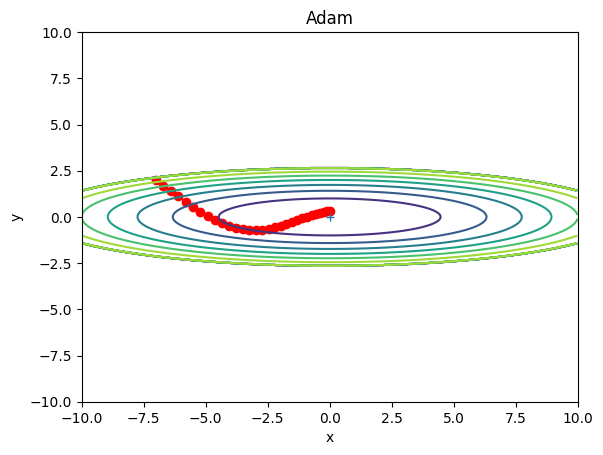

In [5]:
idx = 1

for key in optimizers: # key는 optimizers의 key 값들을 작은 것부터 순회
    optimizer = optimizers[key] # optimizer = SGD(lr=0.95)
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        

        optimizer.update(params, grads)
        
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(1, 1, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()
